# Домашнее задание "Проблема качества данных"

In [175]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Создаем датафрейм. Датафрейм с данными по футболистам и их трансферной стоимостью.\
Научимся предсказывать стоимость футболиста

In [176]:
# Сгенерируем год рождения
year = [np.random.randint(1980, 2015) for sample in range(0,10000)]

# Страна рождения
list_country = ['Brazil', 'Argentina', 'Spain', 'England', 'France', 'Italy', 'Portugal', 'Germany', 'Belgium', 'Serbia', 'Croatia', 'Netherlands']
country = [np.random.choice(list_country) for sample in range(0,10000)]

# Количество сыгранных матчей за клуб
play_match = [np.random.randint(50, 1100) for sample in range(0,10000)]

# Количество сыгранных матчей за сборную страны
country_play_match = [np.random.randint(1, 100) for sample in range(0,10000)]

# Количество забитых мячей за клуб
goals = [np.random.randint(0, 300) for sample in range(0,10000)]

# Количество забитых мячей за сборную
country_goals = [np.random.randint(0, 100) for sample in range(0,10000)]

# Количество голевых передач
passes = [np.random.randint(0, 150) for sample in range(0,10000)]

# Количество отборов
hits = [np.random.randint(0, 3500) for sample in range(0,10000)]

# Количество сейвов ворот
saves = [np.random.randint(0, 5000) for sample in range(0,10000)]

# Количество пропущенных мячей за клуб
lost_goals = [np.random.randint(0, 1500) for sample in range(0,10000)]

# Количество пропущенных мячей за клуб
country_lost_goals = [np.random.randint(0, 150) for sample in range(0,10000)]

# Позиция на поле
list_position = ['goalkeeper', 'defender', 'midfielder', 'striker']
position = [np.random.choice(list_position) for sample in range(0,10000)]


Рассчитаем целевое значение - Трансферная стоимость \
У каждой позиции трансферная стоимость строиться по собственной формуле, потому что разные качества игроков нужны

In [203]:
def cost_goalkeeper(year, saves, play_match, country_play_match, lost_goals, country_lost_goals):
    return (0.3*(2021 - year) + 10*saves/play_match + 0.1*play_match - 3*lost_goals/play_match - 3*country_lost_goals/country_play_match)*100000

def cost_defender(year, goals, country_goals, passes, hits,  play_match, country_play_match, lost_goals, country_lost_goals):
    return (0.4*(2021 - year) + goals/play_match + 1.5*country_goals/country_play_match + passes/play_match + 5*hits/play_match + 0.1*play_match - 0.5*lost_goals/play_match - 0.5*country_lost_goals/country_play_match)*100000

def cost_midfielder(year, goals, country_goals, passes, hits, play_match, country_play_match):
    return (0.4*(2021 - year) + 2*goals/play_match + 2*country_goals/country_play_match + 4*passes/play_match + 2*hits/play_match + 0.1*play_match)*100000

def cost_striker(year, goals, country_goals, passes, play_match, country_play_match):
    return (0.4*(2021 - year) + 7*goals/play_match +7*country_goals/country_play_match + 4*passes/play_match + 0.1*play_match)*1000000

footbal_price = []

for y, pm, cpm, g, cg, p, h, s, lg, clg, pos in zip(year, play_match, country_play_match, goals, country_goals, passes, hits, saves, lost_goals, country_lost_goals, position):
    if pos == 'goalkeeper':
        price = cost_goalkeeper(y, s, pm, cpm, lg, clg)
    
    elif pos == 'defender':
        price = cost_defender(y, g, cg, p, h, pm, cpm, lg, clg)
    
    elif pos == 'midfielder':
        price = cost_midfielder(y, g, cg, p, h, pm, cpm)
    
    elif pos == 'striker':
        price = cost_striker(y, g, cg, p, pm, cpm)
        
    footbal_price.append(int(price))


In [204]:
football_df = pd.DataFrame({'Year': year, 'Country': country, 'Play_match': play_match, 
                            'Country_play_match': country_play_match, 'Goals': goals, 
                            'Country_goals': country_goals, 'Passes': passes, 'Hits': hits, 'Saves': saves,
                            'Lost_goals': lost_goals, 'Country_lost_goals': country_lost_goals, 
                            'Position': position, 'Price': footbal_price})
football_df.head()

,Year,Country,Play_match,Country_play_match,Goals,Country_goals,Passes,Hits,Saves,Lost_goals,Country_lost_goals,Position,Price
0,2013,Germany,76,36,189,20,17,3354,2475,100,52,striker,32991520
1,2003,Italy,397,83,283,66,59,609,666,1047,116,defender,5460682
2,1989,France,555,60,167,93,62,2875,1377,1471,137,defender,9447162
3,1983,Germany,358,85,57,40,101,1349,1099,207,104,goalkeeper,7249309
4,2008,Italy,169,47,288,79,109,1529,581,1057,146,defender,6752666


In [205]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                10000 non-null  int64 
 1   Country             10000 non-null  object
 2   Play_match          10000 non-null  int64 
 3   Country_play_match  10000 non-null  int64 
 4   Goals               10000 non-null  int64 
 5   Country_goals       10000 non-null  int64 
 6   Passes              10000 non-null  int64 
 7   Hits                10000 non-null  int64 
 8   Saves               10000 non-null  int64 
 9   Lost_goals          10000 non-null  int64 
 10  Country_lost_goals  10000 non-null  int64 
 11  Position            10000 non-null  object
 12  Price               10000 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1015.8+ KB


Добавим пропущенных значения и анамалии

In [206]:
# Пропуски данных
for i in range(50):
    football_df.loc[np.random.randint(0,1000), np.random.choice(football_df.columns)] = np.nan

# Добавим анамалии
for i in range(2):
    football_df.loc[np.random.randint(0,1000), 'Year'] = 1900

for i in range(3):
    football_df.loc[np.random.randint(0,1000), 'Play_match'] = 10000

for i in range(5):
    football_df.loc[np.random.randint(0,1000), 'Goals'] = 10000

for i in range(5):
    football_df.loc[np.random.randint(0,1000), 'Passes'] = 10000


In [207]:
football_df

,Year,Country,Play_match,Country_play_match,Goals,Country_goals,Passes,Hits,Saves,Lost_goals,Country_lost_goals,Position,Price
0,2013.0,Germany,76.0,36.0,189.0,20.0,NaN,3354.0,2475.0,100.0,52.0,striker,32991520.0
1,2003.0,Italy,397.0,83.0,283.0,66.0,59.0,609.0,666.0,1047.0,116.0,defender,5460682.0
2,1989.0,France,555.0,60.0,167.0,93.0,62.0,2875.0,1377.0,1471.0,137.0,defender,9447162.0
3,1983.0,Germany,358.0,85.0,57.0,40.0,101.0,1349.0,1099.0,207.0,104.0,goalkeeper,7249309.0
4,2008.0,Italy,169.0,47.0,288.0,79.0,109.0,1529.0,581.0,1057.0,146.0,defender,6752666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1983.0,Belgium,883.0,34.0,249.0,20.0,15.0,2474.0,2646.0,426.0,137.0,goalkeeper,11613045.0
9996,2003.0,Croatia,106.0,71.0,191.0,98.0,77.0,1682.0,261.0,921.0,75.0,goalkeeper,1138758.0
9997,2008.0,Portugal,856.0,59.0,137.0,16.0,116.0,574.0,14.0,1348.0,92.0,midfielder,9354564.0
9998,1989.0,Brazil,387.0,5.0,50.0,41.0,5.0,2435.0,3362.0,57.0,59.0,striker,109856072.0


In [208]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                9998 non-null   float64
 1   Country             9995 non-null   object 
 2   Play_match          9993 non-null   float64
 3   Country_play_match  9998 non-null   float64
 4   Goals               9995 non-null   float64
 5   Country_goals       9996 non-null   float64
 6   Passes              9997 non-null   float64
 7   Hits                9995 non-null   float64
 8   Saves               9995 non-null   float64
 9   Lost_goals          9997 non-null   float64
 10  Country_lost_goals  9997 non-null   float64
 11  Position            9997 non-null   object 
 12  Price               9997 non-null   float64
dtypes: float64(11), object(2)
memory usage: 1015.8+ KB


Пропуски есть - для обучения модели их нужно устранить.\
Для начала просто удалим и посмотрим насколько сильно уменьшаться данные

In [209]:
football_df.dropna(inplace=True)
football_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 1 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                9950 non-null   float64
 1   Country             9950 non-null   object 
 2   Play_match          9950 non-null   float64
 3   Country_play_match  9950 non-null   float64
 4   Goals               9950 non-null   float64
 5   Country_goals       9950 non-null   float64
 6   Passes              9950 non-null   float64
 7   Hits                9950 non-null   float64
 8   Saves               9950 non-null   float64
 9   Lost_goals          9950 non-null   float64
 10  Country_lost_goals  9950 non-null   float64
 11  Position            9950 non-null   object 
 12  Price               9950 non-null   float64
dtypes: float64(11), object(2)
memory usage: 1.1+ MB


Осталось 9950 строк данных - 5% убралось. Процент небольшой, оставим так

Начнем работать с данными.\
Для начала построим модель по имеющимся данным.\
Категорийные переменные Country, Position попутно переделаем в числовое.

In [210]:
X = football_df[['Year', 'Country', 'Play_match', 'Country_play_match', 'Goals',
       'Country_goals', 'Passes', 'Hits', 'Saves', 'Lost_goals',
       'Country_lost_goals', 'Position']]

X = pd.get_dummies(X, columns = ['Country',  'Position'])

y = football_df['Price']

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

In [212]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Проверим встроенными методами на качество на тестовой выборки

In [213]:
model.score(X_test, y_test)

0.5846870125957193

Качество весьма низкое.\
Но попробуем улучшить манипулируя данные для обучения.

Предположим, что мы находимся в идеальном мире и талант игрока не зависит от страны рождения.\
Удалим ее и переобучим модель

In [214]:
X = football_df[['Year', 'Play_match', 'Country_play_match', 'Goals',
       'Country_goals', 'Passes', 'Hits', 'Saves', 'Lost_goals',
       'Country_lost_goals', 'Position']]

X = pd.get_dummies(X, columns = ['Position'])

y = football_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.5838830178122333

Качество стало даже чуть чуть хуже.\
Но оставим так - в нашей картине мира страна - не влияет

Проверим нет ли анамалий и выбросов в данных.\
Посмотрим на базовые метрики

In [215]:
import matplotlib.pyplot as plt

X.describe()

,Year,Play_match,Country_play_match,Goals,Country_goals,Passes,Hits,Saves,Lost_goals,Country_lost_goals,Position_defender,Position_goalkeeper,Position_midfielder,Position_striker
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000
mean,1997.159899,581.069447,49.880905,153.994573,50.074975,79.918693,1753.205226,2495.541206,749.405829,74.864422,0.244121,0.255678,0.244523,0.255678
std,10.064145,343.628867,28.648131,237.235842,28.885625,226.574952,1014.040217,1440.905198,431.283603,43.344481,0.429586,0.436264,0.429825,0.436264
min,1900.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,320.000000,25.000000,74.000000,25.000000,38.000000,868.250000,1247.000000,378.000000,37.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,581.000000,50.000000,149.000000,50.000000,76.000000,1744.000000,2486.500000,752.000000,75.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.000000,841.000000,75.000000,224.000000,75.000000,111.750000,2641.000000,3754.750000,1117.000000,112.000000,0.000000,1.000000,0.000000,1.000000
max,2014.000000,10000.000000,99.000000,10000.000000,99.000000,10000.000000,3499.000000,4999.000000,1499.000000,149.000000,1.000000,1.000000,1.000000,1.000000


Из них видно, что в полях Year, Play_match, Goals, Passes есть большие отклонения. К примеру встречается год 1900 \
Визуализируем эти данные и посмотрим много ли их

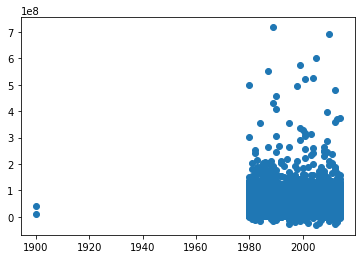

In [216]:
# Год рождения
plt.scatter(X['Year'], y)


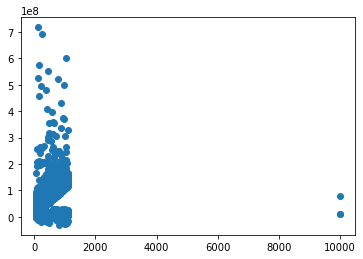

In [217]:
# Cыгранные матчи
plt.scatter(X['Play_match'], y)


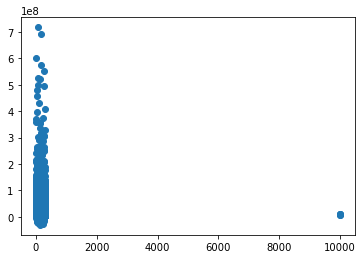

In [218]:
# Забитые голы
plt.scatter(X['Goals'], y)

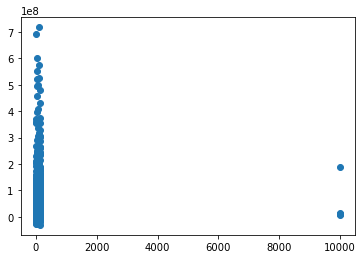

In [219]:
# Результативные передачи
plt.scatter(X['Passes'], y)

Выбросов и анамалий немного. Проще их удалить.

In [220]:
football_df = football_df.drop(football_df[football_df['Year'] == 1900].index)
football_df = football_df.drop(football_df[football_df['Play_match'] == 10000].index)
football_df = football_df.drop(football_df[football_df['Goals'] == 10000].index)
football_df = football_df.drop(football_df[football_df['Passes'] == 10000].index)


Обучим теперь модель

In [221]:
X = football_df[['Year', 'Play_match', 'Country_play_match', 'Goals',
       'Country_goals', 'Passes', 'Hits', 'Saves', 'Lost_goals',
       'Country_lost_goals', 'Position']]

X = pd.get_dummies(X, columns = ['Position'])

y = football_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.6641788690233799

Качество серьезно улучшилось до 66%

Улучшаем дальше.\
Считать чисто количество голов, пассов, сейвов и пропущенных мячей - не совсем правильно, потому что игрок может сыграть разное количество матчей. Правильней будет учитывать отношение количества голов, пассов, сейвов и пропущенных мячей к количеству сыгранные матчей.\
Посчитаем эти данные и обучим модель на них и сравним результаты

In [222]:
football_df['Goals_pers'] = football_df['Goals']/football_df['Play_match']
football_df['Goals_country_pers'] = football_df['Country_goals']/football_df['Country_play_match']
football_df['Passes_pers'] = football_df['Passes']/football_df['Play_match']
football_df['Saves_pers'] = football_df['Saves']/football_df['Play_match']
football_df['Lost_goals_pers'] = football_df['Lost_goals']/football_df['Play_match']
football_df['Lost_goals_country_pers'] = football_df['Country_lost_goals']/football_df['Country_play_match']
football_df['Hits_pers'] = football_df['Hits']/football_df['Play_match']


In [223]:
X = football_df[['Year', 'Play_match', 'Country_play_match', 'Goals_pers',
       'Goals_country_pers', 'Passes_pers', 'Hits_pers', 'Saves_pers', 'Lost_goals_pers',
       'Lost_goals_country_pers', 'Position']]

X = pd.get_dummies(X, columns = ['Position'])

y = football_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.704936966347968

Качество серьезно стало выше. Но думаю это не предел\
Возможно лучше учитывать не год рождения в возраст. Получим его вычев их текущего года

In [226]:
football_df['age'] = football_df['Year'].apply(lambda x: 2021 - x)

Обучим теперь

In [227]:
X = football_df[['age', 'Play_match', 'Country_play_match', 'Goals_pers',
       'Goals_country_pers', 'Passes_pers', 'Hits_pers', 'Saves_pers', 'Lost_goals_pers',
       'Lost_goals_country_pers', 'Position']]

X = pd.get_dummies(X, columns = ['Position'])

y = football_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7049369663479679

Результат почти не изменился

Попробуем улучшить далее\
Разделим данные: логично предположить, что стоимость вратаря, защитника, полузащитника и нападающего строится из разные параметров. Считать их в одной моделе - не лучший вариант.

In [228]:
goalkeeper_df = football_df.where(football_df['Position'] == 'goalkeeper')
goalkeeper_df.dropna(inplace=True)

defender_df = football_df.where(football_df['Position'] == 'defender')
defender_df.dropna(inplace=True)

midfielder_df = football_df.where(football_df['Position'] == 'midfielder')
midfielder_df.dropna(inplace=True)

striker_df = football_df.where(football_df['Position'] == 'striker')
striker_df.dropna(inplace=True)


Поработаем теперь с этими датафреймами отдельно

Начнем с вратаря. Логично, что для него не нужны столбцы забитые мячи, голевые передачи, отборы.\
Оставим только вратарские метрики: сыгранные матчи, пропущенные мячи, количество сейвов

In [234]:
# Получим стоимость вратаря

X = goalkeeper_df[['Year', 'Play_match', 'Country_play_match', 'Saves_pers', 'Lost_goals_pers',
       'Lost_goals_country_pers']]

y = goalkeeper_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.999999999999999

Далее с защитник. Логично, что для него нужны почти все столбцы, потому что он может и забить, и отдать пас, и если он хорошо играет, то пропускает команда меньше. Ну а главная метрика - отборы

In [241]:
# Получим стоимость защитника

X = defender_df[['age', 'Play_match', 'Country_play_match', 'Goals_pers',
       'Goals_country_pers', 'Passes_pers', 'Hits_pers', 'Saves_pers', 'Lost_goals_pers',
       'Lost_goals_country_pers']]

y = defender_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9999999999999918

Полузащитник. Для него не нужны вратарские метрики: сейвы и пропущенные голы

In [242]:
# Получаем стоимость полузащитника

X = midfielder_df[['age', 'Play_match', 'Country_play_match', 'Goals_pers',
       'Goals_country_pers', 'Passes_pers', 'Hits_pers']]

y = midfielder_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9999999999999898

Нападающий. Для него важны голы, голевые передачи

In [244]:
# Получаем стоимость нападающего

X = striker_df[['age', 'Play_match', 'Country_play_match', 'Goals_pers',
       'Goals_country_pers', 'Passes_pers']]

y = striker_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Делим выборки

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

Результат получился почти 100% везде. А для нападающих вообще 100%

### Итог
Начали с качества модели 0.5846870125957193 и манипулируя с исходными данными пришли к качеству в 1.0